<a href="https://colab.research.google.com/github/paulorsf29/Implementacao_CaxeiroViajante_Com_ACO/blob/main/IMPLEMENTA%C3%87%C3%83O_DE_IA_EVOLUTIVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Matriz Gerada com Fator de Tortuosidade (1.29): 48x48 cidades

🚀 INICIANDO SIMULAÇÃO: ACO + REFINAMENTO 2-OPT...
Instância 6: Final=344.6 | Artigo GLPK=344.9
Instância 7: Final=487.9 | Artigo GLPK=438.3
Instância 12: Final=778.4 | Artigo GLPK=672.7
Instância 24: Final=1328.8 | Artigo GLPK=1339.9
Instância 36: Final=1586.8 | Artigo GLPK=1719.2
Instância 48: Final=1939.0 | Artigo GLPK=1942.3

--- GERANDO DASHBOARD COMPARATIVO ---


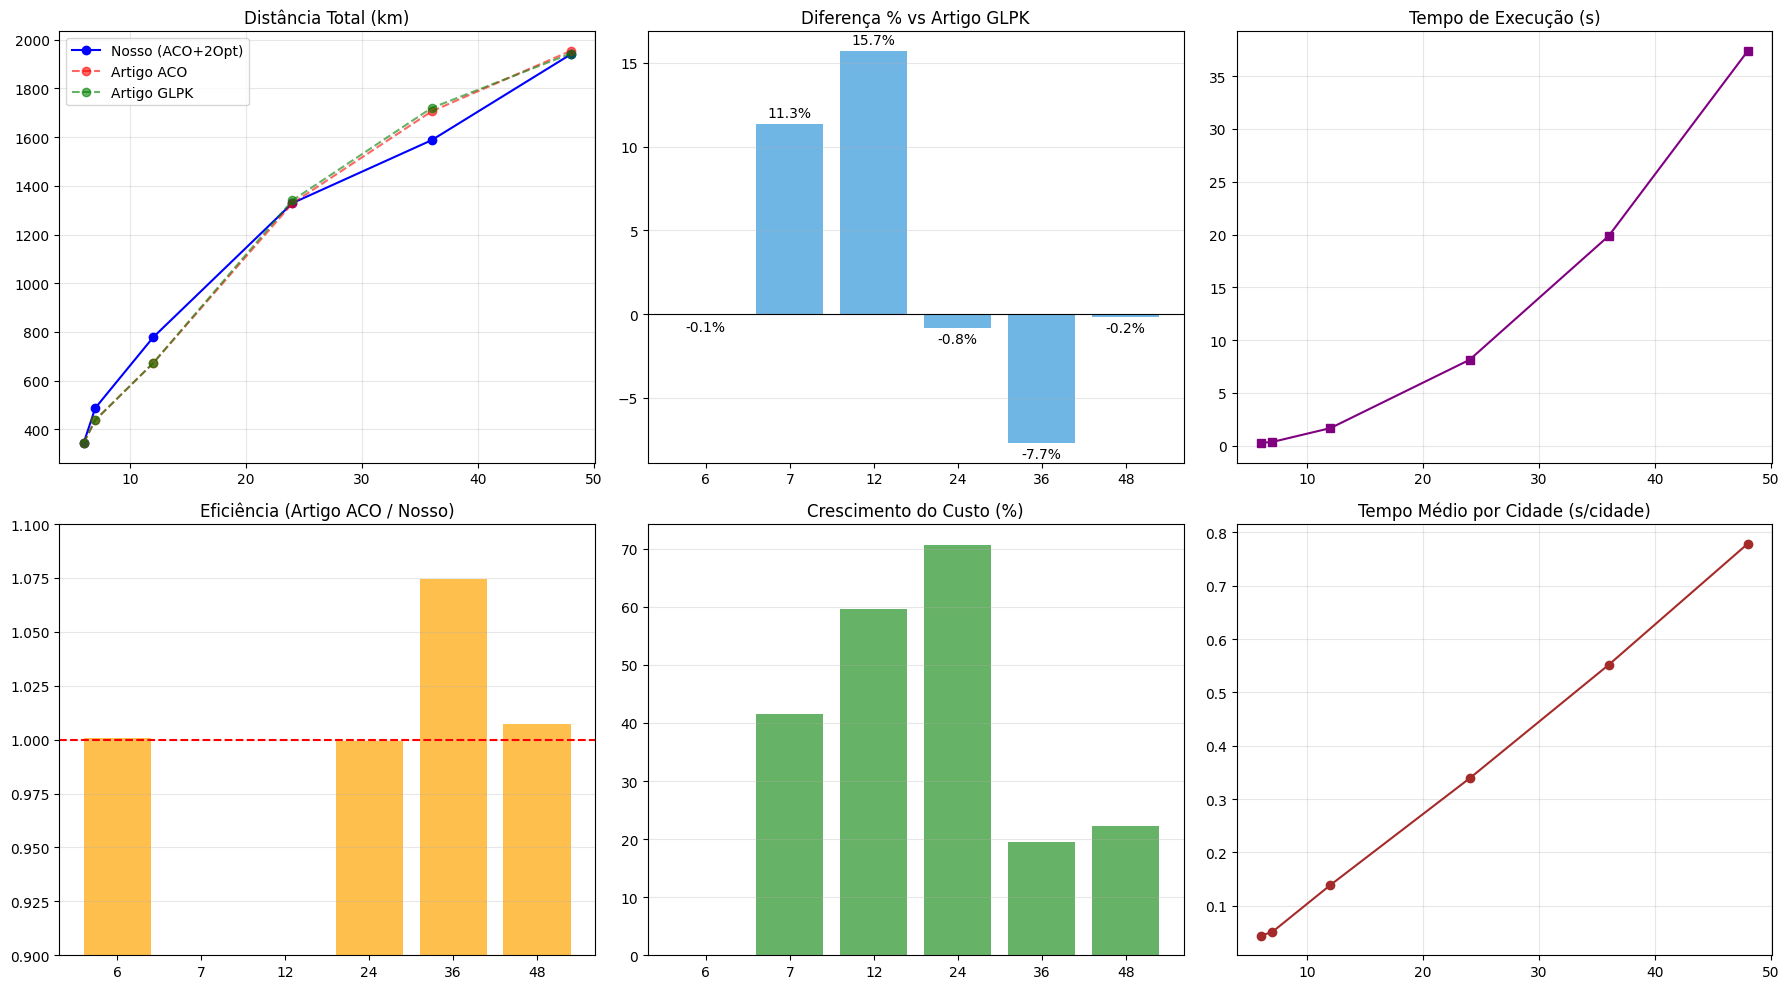


--- TABELA DE RESULTADOS FINAIS ---
Cidades  Nosso      Artigo     GLPK       Diff Art%  Diff GLPK%  Tempo(s)  
---------------------------------------------------------------------------
6        344.6      344.9      344.9      -0.08      -0.08       0.26      
7        487.9      438.3      438.3      11.33      11.33       0.36      
12       778.4      672.7      672.7      15.72      15.72       1.67      
24       1328.8     1327.8     1339.9     0.07       -0.83       8.13      
36       1586.8     1705.1     1719.2     -6.94      -7.70       19.86     
48       1939.0     1953.4     1942.3     -0.74      -0.17       37.38     

--- MAPAS DAS MELHORES ROTAS ENCONTRADAS ---


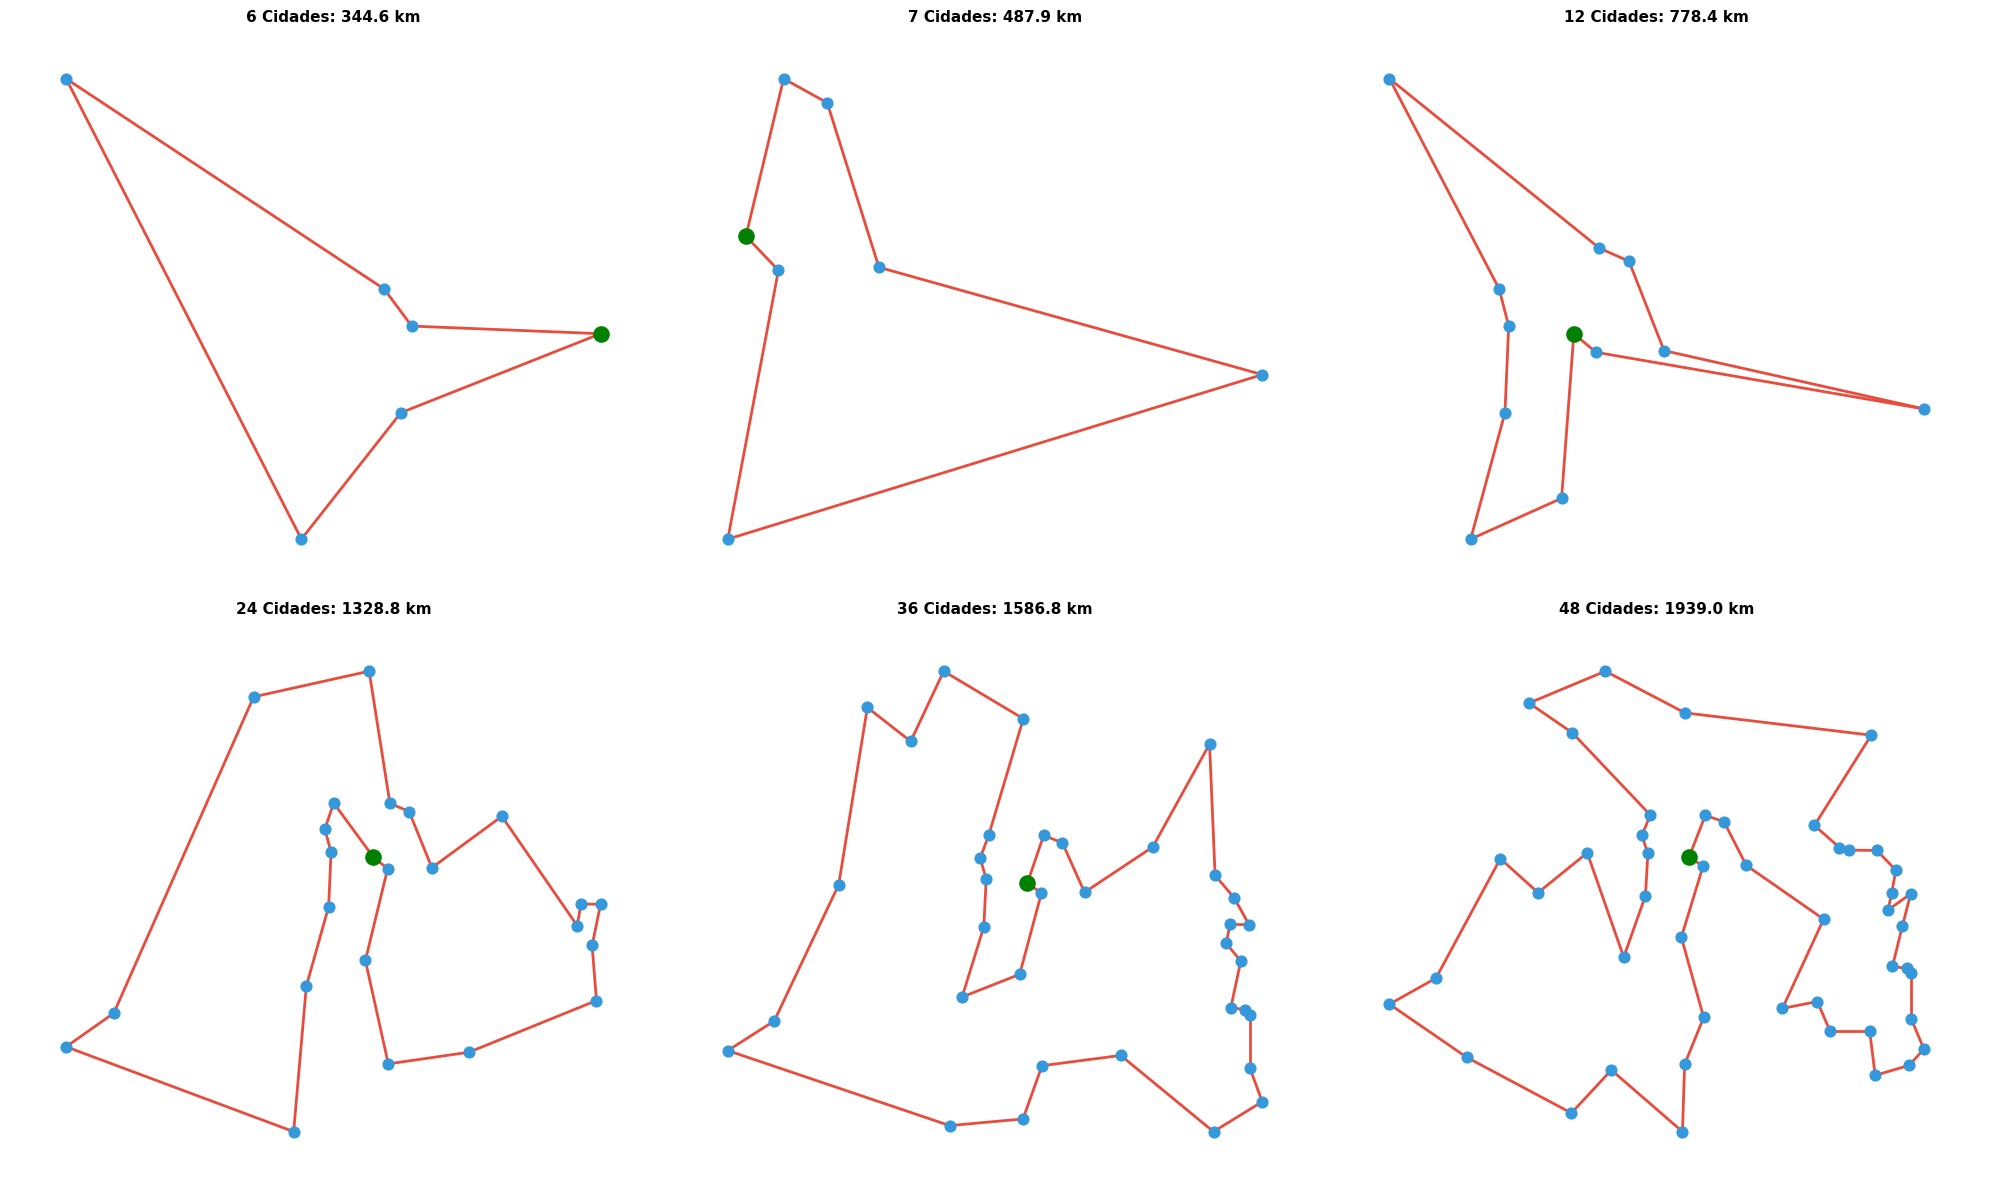


🚛 DETALHAMENTO DAS ROTAS (SEQUÊNCIA DE VISITA)
   Nota: Rotas ajustadas para sempre iniciar e terminar em Angicos

📍 ROTA PARA 6 CIDADES (Distância: 344.6 km)
------------------------------------------------------------
1. Angicos -> 2. São Rafael -> 5. Jucurutu -> 6. Mossoró -> 4. Assú -> 3. Itajá
-> 1. Angicos

📍 ROTA PARA 7 CIDADES (Distância: 487.9 km)
------------------------------------------------------------
1. Angicos -> 10. F. Pedrosa -> 11. Santana Matos -> 7. Natal -> 12. Lajes -> 9.
Pedro Avelino -> 8. Afonso Bezerra -> 1. Angicos

📍 ROTA PARA 12 CIDADES (Distância: 778.4 km)
------------------------------------------------------------
1. Angicos -> 11. Santana Matos -> 5. Jucurutu -> 2. São Rafael -> 3. Itajá ->
4. Assú -> 6. Mossoró -> 8. Afonso Bezerra -> 9. Pedro Avelino -> 12. Lajes ->
7. Natal -> 10. F. Pedrosa -> 1. Angicos

📍 ROTA PARA 24 CIDADES (Distância: 1328.8 km)
------------------------------------------------------------
1. Angicos -> 23. Ipanguaçu -> 4. A

In [ ]:
# @title 🏆 Trabalho Final Completo: ACO(Colonia de formigas)
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import networkx as nx
import math
import time
import textwrap

# =============================================================================
# 1. DADOS DAS CIDADES (COORDENADAS REAIS)
# =============================================================================
cidades_coords = {
    '1. Angicos': (-5.656, -36.608), '2. São Rafael': (-5.801, -36.883),
    '3. Itajá': (-5.642, -36.868), '4. Assú': (-5.574, -36.906),
    '5. Jucurutu': (-6.033, -37.020), '6. Mossoró': (-5.188, -37.344),
    '7. Natal': (-5.794, -35.211), '8. Afonso Bezerra': (-5.499, -36.506),
    '9. Pedro Avelino': (-5.523, -36.388), '10. F. Pedrosa': (-5.690, -36.520),
    '11. Santana Matos': (-5.958, -36.657), '12. Lajes': (-5.687, -36.248),
    '13. Santa Cruz': (-6.226, -36.020), '14. Caicó': (-6.458, -37.098),
    '15. São Miguel': (-6.210, -38.497), '16. S. José Mipibú': (-6.075, -35.236),
    '17. S. Gonçalo': (-5.793, -35.331), '18. Pau dos Ferros': (-6.112, -38.204),
    '19. Parnamirim': (-5.914, -35.263), '20. Macaíba': (-5.856, -35.355),
    '21. Macau': (-5.113, -36.634), '22. João Câmara': (-5.537, -35.818),
    '23. Ipanguaçu': (-5.498, -36.852), '24. Currais Novos': (-6.260, -36.516),
    '25. Ceará-Mirim': (-5.631, -35.425), '26. Canguaretama': (-6.379, -35.128),
    '27. Baraúna': (-5.076, -37.617), '28. Apodi': (-5.662, -37.798),
    '29. Acari': (-6.436, -36.636), '30. Areia Branca': (-4.956, -37.136),
    '31. Extremoz': (-5.705, -35.305), '32. Goianinha': (-6.266, -35.207),
    '33. Monte Alegre': (-6.068, -35.326), '34. Nísia Floresta': (-6.091, -35.207),
    '35. Nova Cruz': (-6.478, -35.435), '36. Touros': (-5.197, -35.460),
    '37. Tangará': (-6.200, -35.800), '38. SP do Potengi': (-5.890, -35.760),
    '39. Santo Antônio': (-6.310, -35.470), '40. Taipu': (-5.630, -35.600),
    '41. Upanema': (-5.640, -37.250), '42. Pedro Velho': (-6.440, -35.220),
    '43. Parelhas': (-6.690, -36.650), '44. Caraúbas': (-5.790, -37.560),
    '45. Alexandria': (-6.410, -38.010), '46. J. de Piranhas': (-6.620, -37.350),
    '47. SJ Campestre': (-6.310, -35.720), '48. Poço Branco': (-5.620, -35.660)
}

nomes_cidades = list(cidades_coords.keys())
coords = list(cidades_coords.values())
n_cidades_total = len(nomes_cidades)

# =============================================================================
# 2. CÁLCULO DE DISTÂNCIA COM FATOR DE TORTUOSIDADE
# =============================================================================
def haversine_distance(coord1, coord2):
    R = 6371  # Raio da Terra em km
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])
    a = math.sin((lat2-lat1)/2)**2 + math.cos(lat1)*math.cos(lat2) * math.sin((lon2-lon1)/2)**2
    return R * 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

def calcular_distancias_reais(coordenadas):
    n = len(coordenadas)
    matriz = np.zeros((n, n))
    FATOR_TORTUOSIDADE = 1.29

    for i in range(n):
        for j in range(n):
            if i != j:
                dist_reta = haversine_distance(coordenadas[i], coordenadas[j])
                matriz[i][j] = dist_reta * FATOR_TORTUOSIDADE
    return matriz

distancias_base = calcular_distancias_reais(coords)
print(f"✅ Matriz Gerada com Fator de Tortuosidade (1.29): {n_cidades_total}x{n_cidades_total} cidades")

# =============================================================================
# 3. ALGORITMO ACO (ANT COLONY OPTIMIZATION)
# =============================================================================
class AntColonyOptimizer:
    def __init__(self, distancias, n_formigas, n_iteracoes, alpha, beta, rho, Q, feromonio_inicial):
        self.distancias = distancias
        self.n_cidades = len(distancias)
        self.n_formigas = n_formigas
        self.n_iteracoes = n_iteracoes
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q
        self.feromonios = np.full((self.n_cidades, self.n_cidades), feromonio_inicial)
        with np.errstate(divide='ignore'):
            self.eta = 1 / distancias
            self.eta[self.eta == np.inf] = 0

    def selecionar_proxima(self, atual, visitadas):
        feromonio = np.power(self.feromonios[atual], self.alpha)
        visibilidade = np.power(self.eta[atual], self.beta)
        probs = feromonio * visibilidade
        probs[list(visitadas)] = 0
        soma = probs.sum()
        if soma == 0:
            return random.choice([i for i in range(self.n_cidades) if i not in visitadas])
        return np.random.choice(range(self.n_cidades), p=probs/soma)

    def rodar(self):
        melhor_rota, melhor_custo = None, float('inf')
        historico = []
        for _ in range(self.n_iteracoes):
            rotas, custos = [], []
            for _ in range(self.n_formigas):
                atual = random.randint(0, self.n_cidades - 1)
                rota = [atual]
                visitadas = {atual}
                custo = 0
                for _ in range(self.n_cidades - 1):
                    prox = self.selecionar_proxima(atual, visitadas)
                    custo += self.distancias[atual][prox]
                    rota.append(prox)
                    visitadas.add(prox)
                    atual = prox
                custo += self.distancias[rota[-1]][rota[0]]
                rota.append(rota[0])
                rotas.append(rota)
                custos.append(custo)
                if custo < melhor_custo:
                    melhor_custo, melhor_rota = custo, rota

            self.feromonios *= (1 - self.rho)
            for i in range(self.n_formigas):
                dt = self.Q / custos[i]
                for j in range(len(rotas[i]) - 1):
                    u, v = rotas[i][j], rotas[i][j+1]
                    self.feromonios[u][v] += dt
                    self.feromonios[v][u] += dt
            historico.append(melhor_custo)
        return melhor_rota, melhor_custo, historico

# =============================================================================
# 4. REFINAMENTO LOCAL (2-OPT)
# =============================================================================
def calcular_custo_rota(rota, matriz_dist):
    custo = 0
    for i in range(len(rota) - 1):
        custo += matriz_dist[rota[i]][rota[i+1]]
    return custo

def two_opt_refinement(rota, distancias_matrix):
    melhor_rota = rota[:]
    melhor_distancia = calcular_custo_rota(melhor_rota, distancias_matrix)
    melhorou = True

    while melhorou:
        melhorou = False
        for i in range(1, len(melhor_rota) - 2):
            for j in range(i + 1, len(melhor_rota)):
                if j - i == 1: continue
                nova_rota = melhor_rota[:]
                nova_rota[i:j] = melhor_rota[j-1:i-1:-1]
                nova_distancia = calcular_custo_rota(nova_rota, distancias_matrix)
                if nova_distancia < melhor_distancia:
                    melhor_rota = nova_rota
                    melhor_distancia = nova_distancia
                    melhorou = True
    return melhor_rota, melhor_distancia

# =============================================================================
# 5. EXECUÇÃO E LOOP PRINCIPAL (CORRIGIDO PARA FIXAR ANGICOS)
# =============================================================================
resultados_artigo_glpk = {6: 344.9, 7: 438.3, 12: 672.7, 24: 1339.9, 36: 1719.2, 48: 1942.3}
resultados_artigo_aco = {6: 344.9, 7: 438.3, 12: 672.7, 24: 1327.8, 36: 1705.1, 48: 1953.4}

instancias = {
    6: [0, 1, 2, 3, 4, 5],
    7: [0, 6, 7, 8, 9, 10, 11],
    12: list(range(12)),
    24: list(range(24)),
    36: list(range(36)),
    48: list(range(48))
}

print("\n🚀 INICIANDO SIMULAÇÃO: ACO + REFINAMENTO 2-OPT...")
resultados_nosso = {}
melhores_rotas = {}
tempos_execucao = {}

for n, indices in instancias.items():
    dist_instancia = distancias_base[np.ix_(indices, indices)]

    if n <= 12:
        params = {'alpha': 0.9, 'beta': 1.5, 'rho': 0.05, 'Q': 100, 'iter': 200}
    else:
        params = {'alpha': 1.5, 'beta': 2.0, 'rho': 0.05, 'Q': 100, 'iter': 300}

    inicio = time.time()

    # 1. Fase Global: ACO
    aco = AntColonyOptimizer(dist_instancia, n, params['iter'], params['alpha'], params['beta'], params['rho'], params['Q'], 0.1)
    rota_aco, custo_aco, _ = aco.rodar()

    # 2. Fase Local: 2-Opt
    if n > 20:
        rota_final, custo_final = two_opt_refinement(rota_aco, dist_instancia)
    else:
        rota_final, custo_final = rota_aco, custo_aco

    # 3. FIXAÇÃO: GARANTIR QUE ROTA COMEÇA E TERMINA EM ANGICOS (Índice 0)
    # Remove a duplicação final para rotacionar
    rota_unica = rota_final[:-1]

    # O índice local '0' corresponde a Angicos em todas as instâncias definidas neste problema
    # (Pois Angicos é sempre o primeiro item da lista de indices)
    if 0 in rota_unica:
        idx_angicos_local = rota_unica.index(0)
        # Gira a lista: [B, C, A, D] -> [A, D, B, C]
        rota_unica = rota_unica[idx_angicos_local:] + rota_unica[:idx_angicos_local]

    # Recoloca Angicos no final para fechar o ciclo
    rota_final = rota_unica + [rota_unica[0]]

    fim = time.time()

    resultados_nosso[n] = custo_final
    melhores_rotas[n] = rota_final
    tempos_execucao[n] = fim - inicio

    print(f"Instância {n}: Final={custo_final:.1f} | Artigo GLPK={resultados_artigo_glpk[n]}")

# =============================================================================
# 6. DASHBOARD DE ANÁLISE
# =============================================================================
print(f"\n--- GERANDO DASHBOARD COMPARATIVO ---")
plt.figure(figsize=(18, 10))
tamanhos = sorted(instancias.keys())
valores_nosso = [resultados_nosso[n] for n in tamanhos]
valores_artigo_aco = [resultados_artigo_aco[n] for n in tamanhos]
valores_artigo_glpk = [resultados_artigo_glpk[n] for n in tamanhos]

# Gráficos
plt.subplot(2, 3, 1)
plt.plot(tamanhos, valores_nosso, 'bo-', label='Nosso (ACO+2Opt)')
plt.plot(tamanhos, valores_artigo_aco, 'ro--', label='Artigo ACO', alpha=0.6)
plt.plot(tamanhos, valores_artigo_glpk, 'go--', label='Artigo GLPK', alpha=0.6)
plt.title('Distância Total (km)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
diferencas_glpk = [((valores_nosso[i] - valores_artigo_glpk[i]) / valores_artigo_glpk[i]) * 100 for i in range(len(tamanhos))]
bars = plt.bar([str(n) for n in tamanhos], diferencas_glpk, color='#3498db', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Diferença % vs Artigo GLPK')
plt.bar_label(bars, fmt='%.1f%%', padding=3)
plt.grid(axis='y', alpha=0.3)

plt.subplot(2, 3, 3)
tempos = [tempos_execucao[n] for n in tamanhos]
plt.plot(tamanhos, tempos, 'purple', marker='s')
plt.title('Tempo de Execução (s)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
eficiencia = [valores_artigo_aco[i] / valores_nosso[i] for i in range(len(tamanhos))]
plt.bar([str(n) for n in tamanhos], eficiencia, color='orange', alpha=0.7)
plt.axhline(1, color='red', linestyle='--')
plt.title('Eficiência (Artigo ACO / Nosso)')
plt.ylim(0.9, 1.1)
plt.grid(axis='y', alpha=0.3)

plt.subplot(2, 3, 5)
crescimento = [0] + [((valores_nosso[i] - valores_nosso[i-1])/valores_nosso[i-1])*100 for i in range(1, len(tamanhos))]
plt.bar([str(n) for n in tamanhos], crescimento, color='green', alpha=0.6)
plt.title('Crescimento do Custo (%)')
plt.grid(axis='y', alpha=0.3)

plt.subplot(2, 3, 6)
complexidade = [tempos_execucao[n]/n for n in tamanhos]
plt.plot(tamanhos, complexidade, 'brown', marker='o')
plt.title('Tempo Médio por Cidade (s/cidade)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 7. TABELA DETALHADA E MAPAS
# =============================================================================
print(f"\n--- TABELA DE RESULTADOS FINAIS ---")
print(f"{'Cidades':<8} {'Nosso':<10} {'Artigo':<10} {'GLPK':<10} {'Diff Art%':<10} {'Diff GLPK%':<11} {'Tempo(s)':<10}")
print("-" * 75)
for n in tamanhos:
    nosso = resultados_nosso[n]
    artigo = resultados_artigo_aco[n]
    glpk = resultados_artigo_glpk[n]
    diff_artigo = ((nosso - artigo) / artigo) * 100
    diff_glpk = ((nosso - glpk) / glpk) * 100
    tempo = tempos_execucao[n]
    print(f"{n:<8} {nosso:<10.1f} {artigo:<10.1f} {glpk:<10.1f} {diff_artigo:<10.2f} {diff_glpk:<11.2f} {tempo:<10.2f}")

# MAPAS
print(f"\n--- MAPAS DAS MELHORES ROTAS ENCONTRADAS ---")
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, n_cidades in enumerate([6, 7, 12, 24, 36, 48]):
    if n_cidades not in melhores_rotas: continue
    ax = axes[idx]
    indices_instancia = instancias[n_cidades]
    rota = melhores_rotas[n_cidades]

    G = nx.Graph()
    pos = {}
    for i in indices_instancia:
        lat, lon = coords[i]
        G.add_node(i)
        pos[i] = (lon, lat)

    edges = []
    for i in range(len(rota) - 1):
        edges.append((indices_instancia[rota[i]], indices_instancia[rota[i+1]]))

    # Desenhar
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='#e74c3c', width=2, ax=ax)
    nx.draw_networkx_nodes(G, pos, node_color='#3498db', node_size=60, ax=ax)

    # AGORA O PONTO VERDE SERÁ SEMPRE ANGICOS (Índice 0 Global -> Mapeado para rota[0])
    cidade_partida_idx = indices_instancia[rota[0]]
    nx.draw_networkx_nodes(G, pos, nodelist=[cidade_partida_idx], node_color='green', node_size=120, ax=ax)

    ax.set_title(f"{n_cidades} Cidades: {resultados_nosso[n_cidades]:.1f} km", fontsize=11, weight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

# =============================================================================
# 8. DETALHAMENTO TEXTUAL DAS ROTAS
# =============================================================================
print(f"\n{'='*80}")
print(f"🚛 DETALHAMENTO DAS ROTAS (SEQUÊNCIA DE VISITA)")
print(f"   Nota: Rotas ajustadas para sempre iniciar e terminar em Angicos")
print(f"{'='*80}")

for n in tamanhos:
    print(f"\n📍 ROTA PARA {n} CIDADES (Distância: {resultados_nosso[n]:.1f} km)")
    print("-" * 60)

    indices_globais = instancias[n]
    rota_locais = melhores_rotas[n]

    # Converte para nomes (já está rotacionado corretamente)
    nomes_sequencia = [nomes_cidades[indices_globais[i]] for i in rota_locais]

    rota_fmt = " -> ".join(nomes_sequencia)
    for linha in textwrap.wrap(rota_fmt, width=80):
        print(linha)

In [ ]:
# =============================================================================
# 9. GERAÇÃO DE MAPA INTERATIVO (FOLIUM)
# =============================================================================
# Instalação silenciosa caso não tenha a biblioteca
try:
    import folium
except ImportError:
    print("Instalando biblioteca Folium para mapas interativos...")
    import subprocess
    subprocess.check_call(["pip", "install", "folium"])
    import folium

print(f"\n{'='*80}")
print(f"🗺️ GERANDO MAPA INTERATIVO REAL (48 CIDADES)")
print(f"{'='*80}")

def gerar_mapa_interativo(n_cidades):
    # Recupera os dados da instância
    indices_globais = instancias[n_cidades]
    rota_locais = melhores_rotas[n_cidades]

    # Reconstrói a sequência de nomes e coordenadas
    sequencia_nomes = []
    sequencia_coords = []

    # Garante a rotação para começar em Angicos (Lógica visual)
    rota_ajustada = rota_locais[:]

    # Mapeia índice local -> global
    rota_global = [indices_globais[i] for i in rota_ajustada]

    # Rotaciona para Angicos (Indice 0) ser o primeiro
    if 0 in rota_global:
        idx_angicos = rota_global.index(0)
        rota_global = rota_global[idx_angicos:] + rota_global[:idx_angicos]
        rota_global.append(0) # Fecha o ciclo

    for idx_global in rota_global:
        nome = nomes_cidades[idx_global]
        coord = cidades_coords[nome]
        sequencia_nomes.append(nome)
        sequencia_coords.append(coord)

    # 1. Cria o Mapa Base (Centralizado no RN)
    centro_mapa = [-5.8, -36.5] # Coordenada média aproximada do RN
    m = folium.Map(location=centro_mapa, zoom_start=8, tiles='OpenStreetMap')

    # 2. Adiciona a Linha da Rota
    folium.PolyLine(
        locations=sequencia_coords,
        color='red',
        weight=2.5,
        opacity=0.8,
        tooltip=f'Rota Otimizada ({resultados_nosso[n_cidades]:.1f} km)'
    ).add_to(m)

    # 3. Adiciona Marcadores para cada cidade
    for i, (coord, nome) in enumerate(zip(sequencia_coords[:-1], sequencia_nomes[:-1])):
        # Ícone especial para Angicos (Início/Fim)
        if "Angicos" in nome:
            icone = folium.Icon(color='green', icon='home', prefix='fa') # Requer font-awesome, ou use default
            folium.Marker(
                location=coord,
                popup=f"<b>INÍCIO/FIM:</b> {nome}",
                tooltip=f"0. {nome}",
                icon=folium.Icon(color='green', icon='flag')
            ).add_to(m)
        else:
            # Marcadores numerados ou pontos simples
            folium.CircleMarker(
                location=coord,
                radius=6,
                popup=f"Parada {i}: {nome}",
                tooltip=f"{i}. {nome}",
                color="blue",
                fill=True,
                fill_color="blue"
            ).add_to(m)

    return m

mapa_48 = gerar_mapa_interativo(48)

nome_arquivo = "mapa_rota_48_cidades.html"
mapa_48.save(nome_arquivo)

print(f"✅ Mapa interativo salvo como '{nome_arquivo}'.")
print("   Abra este arquivo no seu navegador para ver o mapa real com zoom.")

mapa_48


🗺️ GERANDO MAPA INTERATIVO REAL (48 CIDADES)
✅ Mapa interativo salvo como 'mapa_rota_48_cidades.html'.
   Abra este arquivo no seu navegador para ver o mapa real com zoom.
